In [1]:
import pandas as pd
from pylab import *
import numpy as np

%matplotlib inline

df = pd.read_csv("data/imdb.csv")

In [2]:
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

### Top best movies

In [3]:
df.sort_values("star_rating", ascending=False).head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


### Everage rating by ganre

In [4]:
df.groupby("genre")["star_rating"].agg("mean").reset_index().sort_values("star_rating", ascending=False)

,genre,star_rating
15,Western,8.255556
9,Film-Noir,8.033333
10,History,8.000000
12,Mystery,7.975000
1,Adventure,7.933333
13,Sci-Fi,7.920000
5,Crime,7.916935
2,Animation,7.914516
6,Drama,7.902518
0,Action,7.884559


### Everage rating by ganre

In [5]:
df.groupby("genre")["star_rating"].agg("mean").sort_values(ascending=False)

genre
Western      8.255556
Film-Noir    8.033333
History      8.000000
Mystery      7.975000
Adventure    7.933333
Sci-Fi       7.920000
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Family       7.850000
Comedy       7.822436
Horror       7.806897
Fantasy      7.700000
Thriller     7.680000
Name: star_rating, dtype: float64

### Best 5 Crime movies

In [6]:
df.loc[df["genre"] == "Crime", ["title", "duration", "star_rating"]].sort_values("star_rating", ascending=False).set_index("title").head(5)

,duration,star_rating
title,,
The Shawshank Redemption,142,9.3
The Godfather,175,9.2
The Godfather: Part II,200,9.1
Pulp Fiction,154,8.9
City of God,130,8.7


### Movies with Brad Pitt, sorted by rating and duration

In [7]:
df.loc[df["actors_list"].str.contains("Brad Pitt"), ["title", "star_rating", "genre", "duration"]].sort_values(["star_rating", "duration"], ascending=False)

,title,star_rating,genre,duration
9,Fight Club,8.9,Drama,139
24,Se7en,8.7,Drama,127
114,Inglourious Basterds,8.3,Adventure,153
106,Snatch.,8.3,Comedy,102
264,Twelve Monkeys,8.1,Mystery,129
508,The Curious Case of Benjamin Button,7.8,Drama,166
577,Ocean's Eleven,7.8,Crime,116
683,Fury,7.7,Action,134
807,The Assassination of Jesse James by the Coward...,7.6,Biography,160
776,Moneyball,7.6,Biography,133


### Rate

In [8]:
df_rating = df.groupby("content_rating")["star_rating"].agg(["count", "min", "max", "mean"]).sort_values("mean", ascending=False)
df_rating[df_rating["count"] > 10]

,count,min,max,mean
content_rating,,,,
NOT RATED,65,7.5,8.9,8.123077
APPROVED,47,7.5,8.7,8.027660
UNRATED,38,7.4,8.7,7.994737
G,32,7.4,8.6,7.990625
PG,123,7.4,8.8,7.879675
R,460,7.4,9.3,7.854783
PG-13,189,7.4,9.0,7.828571


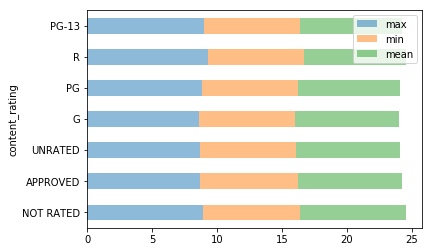

In [9]:
df_rating[df_rating["count"] > 10][["max", "min", "mean"]].plot(kind="barh", alpha=.5, stacked=True);